Import library

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read File CSV

In [48]:
df = pd.read_csv("auto-mpg.csv")

Tes head

In [49]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Convert horsepower karena ada yang non integer

In [50]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

Rata-rata, standar deviasi, nilai minimum, nilai maksimum, Q1, Q2, dan Q3 dari attribute bertipe angka

In [51]:
numeric_df = df.select_dtypes(include='number')

# Now compute describe + quantiles safely
desc_stats = numeric_df.describe().T
desc_stats["Q1"] = numeric_df.quantile(0.25)
desc_stats["Q2"] = numeric_df.quantile(0.50)
desc_stats["Q3"] = numeric_df.quantile(0.75)

print(desc_stats)

              count         mean         std     min       25%     50%  \
mpg           398.0    23.514573    7.815984     9.0    17.500    23.0   
cylinders     398.0     5.454774    1.701004     3.0     4.000     4.0   
displacement  398.0   193.425879  104.269838    68.0   104.250   148.5   
horsepower    392.0   104.469388   38.491160    46.0    75.000    93.5   
weight        398.0  2970.424623  846.841774  1613.0  2223.750  2803.5   
acceleration  398.0    15.568090    2.757689     8.0    13.825    15.5   
model year    398.0    76.010050    3.697627    70.0    73.000    76.0   
origin        398.0     1.572864    0.802055     1.0     1.000     1.0   

                   75%     max        Q1      Q2        Q3  
mpg             29.000    46.6    17.500    23.0    29.000  
cylinders        8.000     8.0     4.000     4.0     8.000  
displacement   262.000   455.0   104.250   148.5   262.000  
horsepower     126.000   230.0    75.000    93.5   126.000  
weight        3608.000  5140

10 record pertama dari dataset dengan attribute bertipe angka

In [57]:
print("\n10 Data Numerik:\n", df.select_dtypes(include=np.number).head(10))


First 10 numeric records:
     mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   
5  15.0          8         429.0       198.0    4341          10.0   
6  14.0          8         454.0       220.0    4354           9.0   
7  14.0          8         440.0       215.0    4312           8.5   
8  14.0          8         455.0       225.0    4425          10.0   
9  15.0          8         390.0       190.0    3850           8.5   

   model year  origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  
5          70       1  
6          70       1  
7        

Informasi jumlah record, jumlah attribute, nama attribute, jumlah attribute dengan tipe angka

In [58]:
print("\nDataset info:")
print("Number of records:", df.shape[0])
print("Number of attributes:", df.shape[1])
print("Attribute names:", df.columns.tolist())
print("Number of numeric attributes:", df.select_dtypes(include=np.number).shape[1])


Dataset info:
Number of records: 398
Number of attributes: 9
Attribute names: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
Number of numeric attributes: 8


Jumlah label dari semua attribute yang bernilai object.

In [59]:
object_columns = df.select_dtypes(include='object').columns
for col in object_columns:
    print(f"Unique labels in {col}: {df[col].nunique()}")

Unique labels in car name: 305


Diagram batang

C:\Users\lenovo\AppData\Local\Temp\ipykernel_35008\4024146928.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cylinders', y='mpg', data=mpg_by_cyl, palette="viridis")


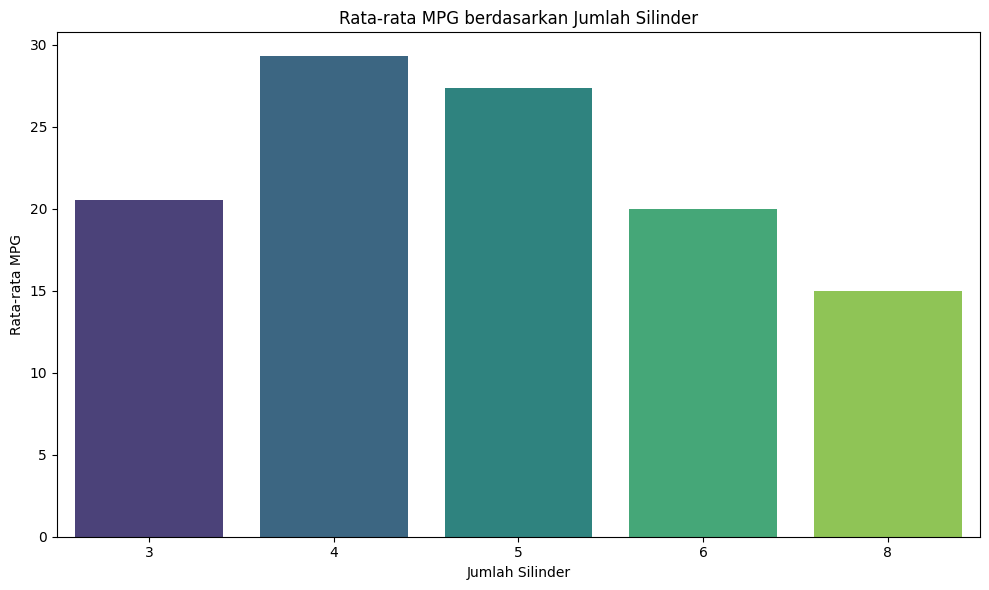

In [63]:
mpg_by_cyl = df.groupby('cylinders')['mpg'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='cylinders', y='mpg', data=mpg_by_cyl, palette="viridis")
plt.title('Rata-rata MPG berdasarkan Jumlah Silinder')
plt.xlabel('Jumlah Silinder')
plt.ylabel('Rata-rata MPG')
plt.tight_layout()
plt.show()

Heatmap

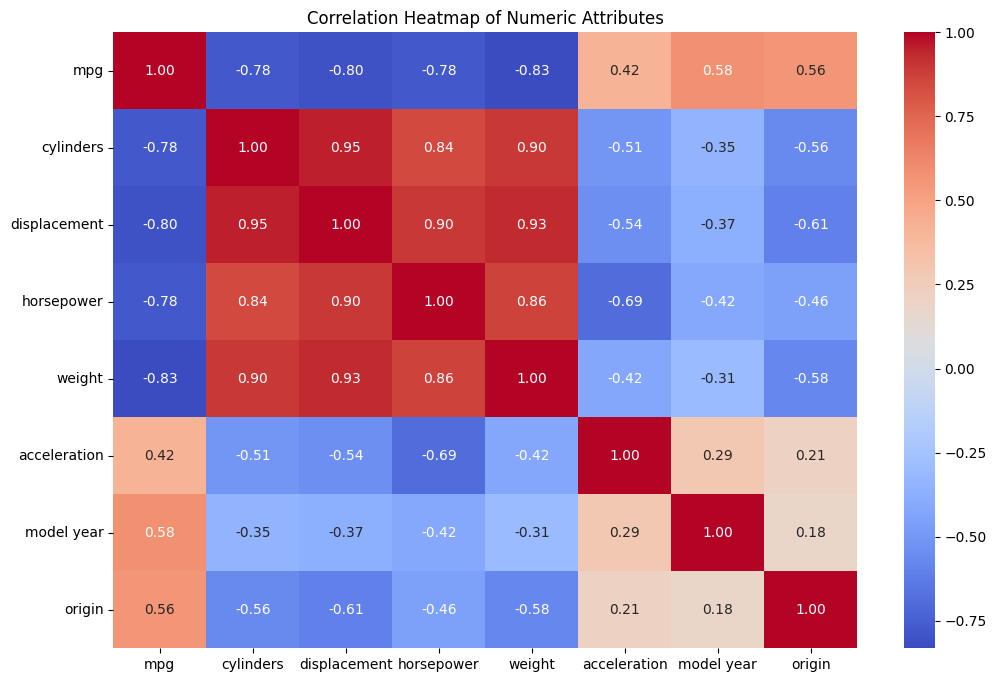

In [61]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Attributes')
plt.show()

Analisis dan kesimpulan
-Nilai MPG (Miles per Gallon) bervariasi tergantung jumlah silinder.  
-Kendaraan dengan jumlah silinder lebih sedikit cenderung memiliki MPG lebih tinggi, menunjukkan efisiensi bahan bakar lebih baik.
-Beberapa atribut seperti `displacement` dan `horsepower` juga berpengaruh terhadap MPG.
-Jumlah kendaraan dengan 4 silinder paling banyak dibandingkan dengan yang 6 atau 8 silinder.  
-Visualisasi batang menunjukkan tren jelas bahwa kendaraan dengan lebih banyak silinder umumnya lebih boros bahan bakar.